In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [25]:
n = 4
i1 = n - 1
i2 = n + 29
i3 = n + 59


In [26]:
data_dir = '101food/train'

classes = sorted(os.listdir(data_dir))
selected_classes = [classes[i1], classes[i2], classes[i3]]
selected_classes

['beet_salad', 'escargots', 'mussels']

In [19]:
train_data = []
test_data = []

for cls in selected_classes:
    cls_path = os.path.join(data_dir, cls)
    cls_images = [os.path.join(cls, img) for img in os.listdir(cls_path)]
    train, test = train_test_split(cls_images, test_size=0.3, random_state=42)
    train_data.extend([(cls, img) for img in train])
    test_data.extend([(cls, img) for img in test])

train_df = pd.DataFrame(train_data, columns=['class', 'image'])
test_df = pd.DataFrame(test_data, columns=['class', 'image'])


In [20]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, directory=data_dir, x_col='image', y_col='class', target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(test_df, directory=data_dir, x_col='image', y_col='class', target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 156 validated image filenames belonging to 3 classes.
Found 69 validated image filenames belonging to 3 classes.


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),Conv2D(64, (3, 3), activation='relu'),MaxPooling2D(pool_size=(2, 2)),Conv2D(128, (3, 3), activation='relu'),MaxPooling2D(pool_size=(2, 2)),Flatten(),Dense(256, activation='relu'),Dropout(0.5),Dense(3, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [22]:
epochs = 25
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)


Epoch 1/25
5/5 [==============================] - 5s 874ms/step - loss: 2.2525 - accuracy: 0.2821 - val_loss: 1.0682 - val_accuracy: 0.3333
Epoch 2/25
5/5 [==============================] - 4s 698ms/step - loss: 1.0899 - accuracy: 0.3846 - val_loss: 1.0237 - val_accuracy: 0.5652
Epoch 3/25
5/5 [==============================] - 4s 687ms/step - loss: 0.9813 - accuracy: 0.4872 - val_loss: 0.7958 - val_accuracy: 0.7101
Epoch 4/25
5/5 [==============================] - 4s 689ms/step - loss: 1.0304 - accuracy: 0.4679 - val_loss: 0.8031 - val_accuracy: 0.5362
Epoch 5/25
5/5 [==============================] - 4s 725ms/step - loss: 0.8623 - accuracy: 0.5513 - val_loss: 0.7793 - val_accuracy: 0.7246
Epoch 6/25
5/5 [==============================] - 4s 684ms/step - loss: 0.8120 - accuracy: 0.6282 - val_loss: 0.5943 - val_accuracy: 0.8261
Epoch 7/25
5/5 [==============================] - 4s 696ms/step - loss: 0.6792 - accuracy: 0.6538 - val_loss: 0.5468 - val_accuracy: 0.7391
Epoch 8/25
5/5 [====

In [23]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 80ms/step - loss: 0.5087 - accuracy: 0.8116
Test loss: 0.5087
Test accuracy: 0.8116


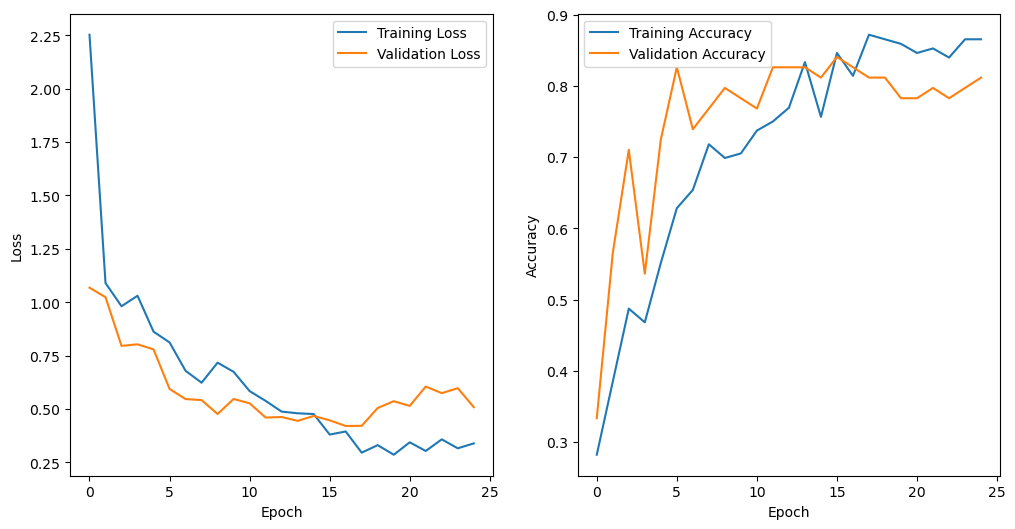

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
